In [129]:
require(ggplot2)
source("00_functions.R")


 loading required packages



### read in data

In [125]:
trees_df = read.csv("../Results/trees_matrix.csv", row.names=1)
# trees_df   = read.csv("../Results/trees_genus_matrix.csv", `row.names=1)
mamls_df = read.csv("../Results/mammals_matrix.csv", row.names=1)
btles_df = read.csv("../Results/beetles_matrix.csv", row.names=1)

trees_cen  = read.csv("../Results/trees_census_dates.csv")
btles_cen  = read.csv("../Results/beetles_census_dates.csv")
mamls_cen  = read.csv("../Results/mammals_census_dates.csv")


### pca on all subplot_census by species matrix

In [67]:
pca.rslt_trees = do_pca(trees_df, scale = F, plot = F)
pca.rslt_mamls = do_pca(mamls_df, scale = F, plot = F)
pca.rslt_btles = do_pca(btles_df, scale = F, plot = F)

cat("Explained Varience Trees:")
pca.rslt_trees@exp.var[0:3]
cat("Explained Varience Mammals:")
pca.rslt_mamls@exp.var[0:3]
cat("Explained Varience Beetles:")
pca.rslt_btles@exp.var[0:3]

Explained Varience Trees:

PC1        PC2        PC3 
0.28892554 0.05653079 0.04438155

Explained Varience Mammals:

PC1        PC2        PC3 
0.41494884 0.21461567 0.09989944

Explained Varience Beetles:

PC1        PC2        PC3 
0.87510094 0.08442535 0.01803936

### construct hyervolumes

In [68]:
hvs_rslts_trees = hvs_rslts(pca.rslt_trees@axis, axis = c("PC1", "PC2", "PC3"), "seq", trees_cen)
hvs_rslts_mamls = hvs_rslts(pca.rslt_mamls@axis, axis = c("PC1", "PC2", "PC3"), "seq", mamls_cen)
hvs_rslts_btles = hvs_rslts(pca.rslt_btles@axis, axis = c("PC1", "PC2", "PC3"), "seq", btles_cen)

# cat("\n\n")
# cat("Trees: ",   sum(is.na(hvs.rslts_trees@rslts$centroid_PC1))/nrow(hvs.rslts_trees@rslts), "\n")
# cat("Mammals: ", sum(is.na(hvs.rslts_mammals@rslts$centroid_PC1))/nrow(hvs.rslts_mammals@rslts), "\n")
# cat("Beetles: ", sum(is.na(hvs.rslts_beetles@rslts$centroid_PC1))/nrow(hvs.rslts_beetles@rslts))


Building Hypervolume  36  of  36 :  Tower_c4 
Comparing Hypervolume 27  of  27 :  Tower_c3-c4 

Building Hypervolume  36  of  36 :  E100-2_c2017
Comparing Hypervolume 30  of  30 :  E100-2_c2016-c2017

Building Hypervolume  60  of  60 :  VJR_P3
Comparing Hypervolume 40  of  40 :  VJR_P2-P3


### plot hypervolumes

In [69]:
#hvs_rslts_trees@compare
#plot_hvs(hvs_rslts_trees)

### compare hypervolumes

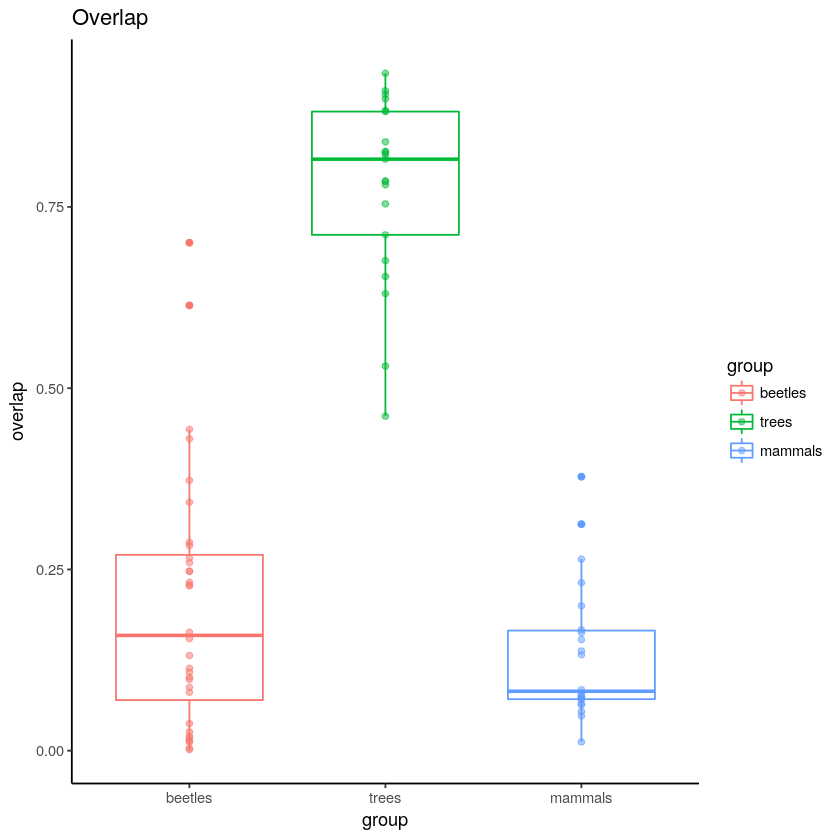

In [70]:
b = data.frame(group = "beetles", overlap = hvs_rslts_btles@compare$overlap)
t = data.frame(group = "trees",   overlap = hvs_rslts_trees@compare$overlap)
m = data.frame(group = "mammals", overlap = hvs_rslts_mamls@compare$overlap)

whisker = rbind(b, t, m)
whisker = whisker[complete.cases(whisker), ]

plt = ggplot(data = whisker, aes(x = group, y = overlap, color = group))
plt = plt + geom_boxplot()
plt = plt + geom_point(alpha = 0.5)
plt = plt + theme_classic()
plt = plt + ggtitle("Overlap")
print(plt)

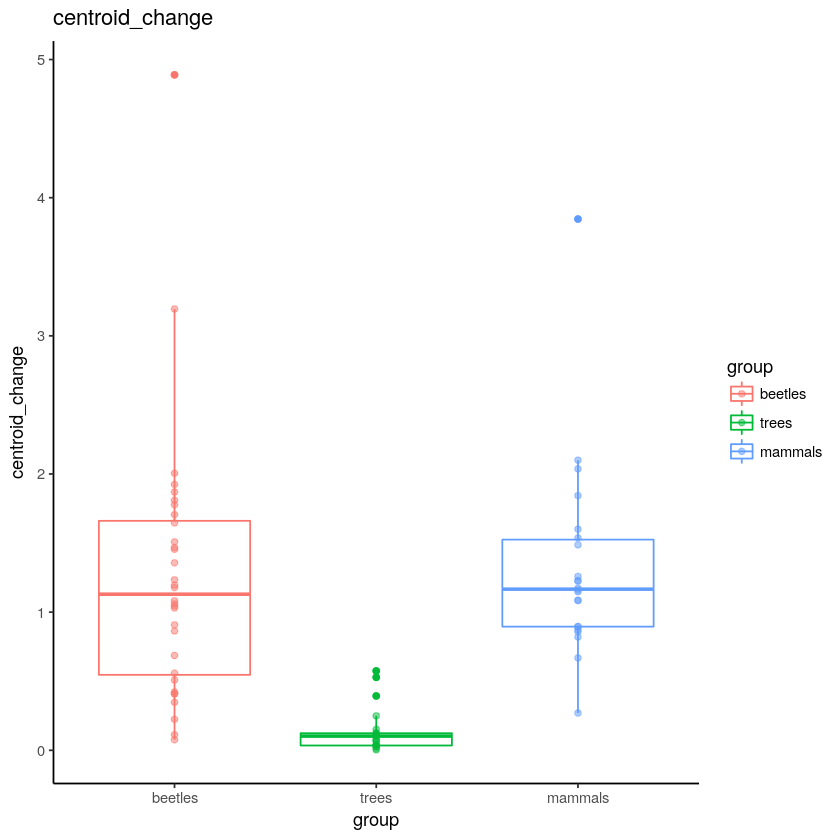

In [71]:
b = data.frame(group = "beetles", centroid_change = hvs_rslts_btles@compare$centroid_change)
t = data.frame(group = "trees",   centroid_change = hvs_rslts_trees@compare$centroid_change)
m = data.frame(group = "mammals", centroid_change = hvs_rslts_mamls@compare$centroid_change)

whisker = rbind(b, t, m)
whisker = whisker[complete.cases(whisker), ]

plt = ggplot(data = whisker, aes(x = group, y = centroid_change, color = group))
plt = plt + geom_boxplot()
plt = plt + geom_point(alpha = 0.5)
plt = plt + theme_classic()
plt = plt + ggtitle("centroid_change")
print(plt)

### whats up with beetles!?

In [72]:
hvs_rslts_btles@compare[order(hvs_rslts_btles@compare$overlap),]

,plot,census_step,centroid_change,overlap,unique_1,unique_2,abs_vol_change,per_vol_change
A_P2-P3,A,P2-P3,1.86923039,0.001403665,0.000000000,0.99859633,42.439937280,711.42050103
OP3_P2-P3,OP3,P2-P3,1.19605631,0.003420951,0.017391304,0.99657884,0.032269830,286.21518781
LF2_P1-P2,LF2,P1-P2,1.50867496,0.011502363,0.028571429,0.98849374,0.076658049,83.42612458
OG3_P1-P2,OG3,P1-P2,0.22452442,0.013780563,0.025229358,0.98621452,0.011233742,69.70995334
OP_P2-P3,OP,P2-P3,4.88920718,0.017227062,0.009578544,0.98277007,148.300091325,56.48260723
LF1_P2-P3,LF1,P2-P3,1.45512448,0.020015136,0.979975659,0.02245250,-0.029202352,-0.97951574
LF3_P1-P2,LF3,P1-P2,0.34800052,0.025827030,0.015186916,0.97416268,0.007276649,37.11591349
LFE_P1-P2,LFE,P1-P2,2.00581114,0.037468101,0.962512642,0.01352426,-40.894237624,-0.96199870
F_P2-P3,F,P2-P3,1.17768039,0.080563860,0.060674157,0.91901470,65.076374076,10.59872056
OP3_P1-P2,OP3,P1-P2,0.40996610,0.087438486,0.912277428,0.03571429,-0.001126616,-0.90902844


## model???!!!

In [ ]:
attributes <- read.csv("../Results/trees_sorted.csv")
a = as.data.frame(attributes %>% group_by(plot_c) %>% summarise(stem_C = sum(stem_C)))

hvs_rslts_trees@rslts   = merge(hvs_rslts_trees@rslts, a, by = "plot_c", all.x = T)
# need to figure out compare - maybe do change in AGB too?
# hvs_rslts_trees@compare = merge(hvs_rslts_trees@compare, a, by = "plot_c", all.x = T)

In [105]:
trees_agb = read.csv("../Results/trees_agb.csv")
btles_agb = read.csv("../Results/btles_agb.csv")
mamls_agb = read.csv("../Results/mamls_agb.csv")

In [106]:
btles = hvs_rslts_btles@compare
btles$taxa = "Beetles"
colnames(btles_agb) = c("plot", "agb")
btles = merge(btles, btles_agb, by = "plot")

In [107]:
trees = hvs_rslts_trees@compare
trees$taxa = "Trees"
colnames(trees_agb) = c("plot", "agb")
trees = merge(trees, trees_agb, by = "plot")

In [108]:
mamls = hvs_rslts_mamls@compare
mamls$taxa = "Mammals"
colnames(mamls_agb) = c("plot", "agb")
mamls = merge(mamls, mamls_agb, by = "plot")

In [120]:
test = rbind(trees, btles, mamls)
test = test[complete.cases(test), ]

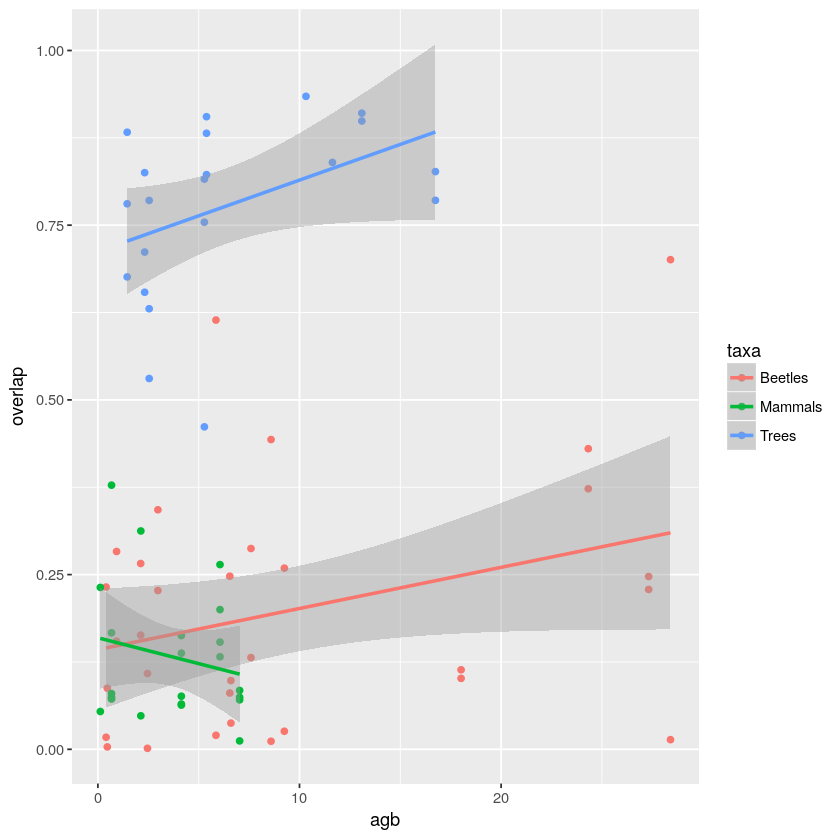

In [124]:
ggplot(data = test, aes(x = agb, y = overlap, color = taxa)) + geom_point() + geom_smooth(method = 'lm')